In [24]:
import pandas as pd
import matplotlib
import numpy as n
import os

%matplotlib notebook
matplotlib.style.use('ggplot')
matplotlib.rcParams['figure.figsize']=[10,6]
pd.options.display.width = 0
pd.set_option('display.max_columns', None)

In [25]:
data_path = '../../go-livepeer/bench_results.csv'
max_rt_ratio = 0.8

In [26]:
data = pd.read_csv(data_path)
data_nice = data[data.rt_dur_ratio<max_rt_ratio]

<IPython.core.display.Javascript object>


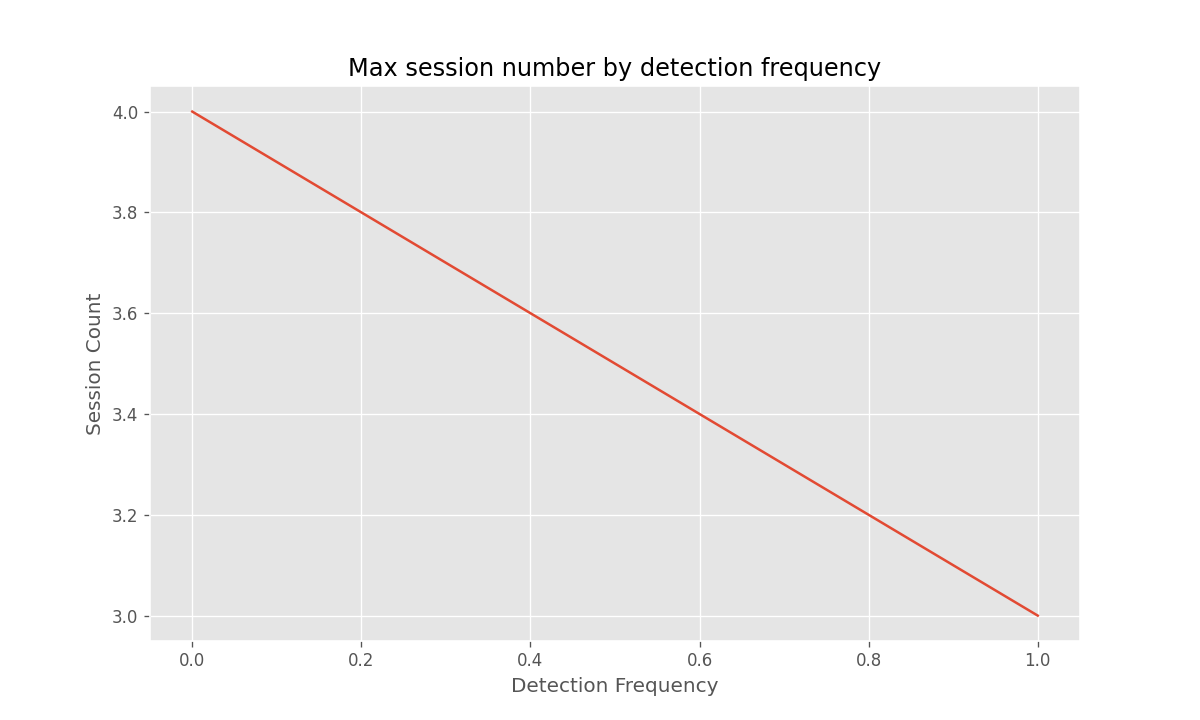

<AxesSubplot:title={'center':'Max session number by detection frequency'}, xlabel='Detection Frequency', ylabel='Session Count'>

In [30]:
data_nice.sess_count.groupby(data_nice.detect_freq).max().plot(ylabel='Session Count', xlabel='Detection Frequency', title='Max session number by detection frequency')